In [60]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
import scipy.signal as signal
import numpy as np

from IPython.display import Audio, display, HTML
from ipywidgets import interact

from scipy.io import wavfile
import requests
from io import BytesIO
#plt.style.use('ggplot')
plt.style.use('classic')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['animation.writer'] = 'avconv'
matplotlib.rcParams['figure.figsize'] = "15,5"

# workaround function for strange interact implementation
def showInInteract():
    import inspect
    for i in range(5):
        if 'interaction.py' in inspect.stack()[i][1]: plt.show()

# Sum of a sine and cosine with equal frequency

In [2]:
s = lambda t: a_n*np.cos(2*np.pi*t/T)
c = lambda t: b_n*np.sin(2*np.pi*t/T)

In [3]:
Fs = 100  # the sampling frequency for the discrete analysis__Hz
Tw = 3     # time duration to look at__sec
t = np.arange(0, Tw, 1/Fs)

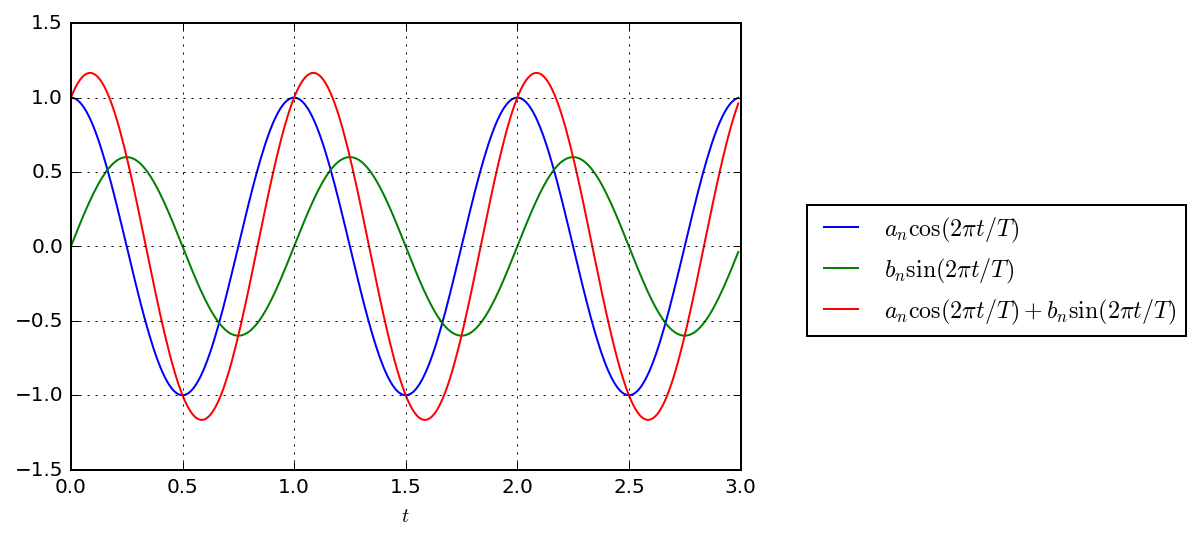

In [4]:
a_n = 1
b_n = 0.6
Freq=1
T = 1/Freq     # signal period, f=1/T

#plt.figure(figsize=(5,3))
plt.plot(t, s(t), 'b', label='$a_n\cos(2\pi t/T)$')
plt.plot(t, c(t), 'g', label='$b_n\sin(2\pi t/T)$')
plt.plot(t, s(t)+c(t), 'r', label='$a_n\cos(2\pi t/T)+b_n\sin(2\pi t/T)$')
plt.legend(loc=(1.1,0.3)); plt.grid(); plt.xlabel('$t$');

# interective

In [5]:
def sumSineCosine(an, bn):
    Fs = 100
    Tw = 3
    T = 1
    t = np.arange(0, Tw, 1/Fs)
    
    A = np.sqrt(an**2+bn**2)
    phi = np.arctan2(bn, an)

    f1 = an*np.cos(2*np.pi*t/T)
    f2 = bn*np.sin(2*np.pi*t/T)
    
    overall = A*np.cos(2*np.pi*t/T - phi)

    plt.gcf().clear()
    plt.plot(t, f1, 'b', label='$x(t)=a_n\cos(2\pi nft)$')
    plt.plot(t, f2, 'g', label='$y(t)=b_n\sin(2\pi nft)$')
    plt.plot(t, f1+f2, 'r', label='$x(t)+y(t)$')
    plt.plot(t, overall, 'ro', lw=2, markevery=Fs//(10), label='$A_n\cos(2\pi nft-\phi)$') #lw= line width
    plt.grid(True)
    plt.xlabel('$t$');
    plt.ylabel('amplitude')
    plt.legend(loc=(1.1,0.3),fontsize=10)
    plt.ylim((-3,3))
    plt.text(3.5, 2, r"$a_n=%.1f, b_n=%.1f, \phi=%1.2f$" % (an, bn,phi), bbox=dict(facecolor="white"))
    showInInteract()

In [6]:
interact(sumSineCosine, an= (-2, 2, 0.2), bn= (-2, 2, 0.2));

interactive(children=(FloatSlider(value=0.0, description='an', max=2.0, min=-2.0, step=0.2), FloatSlider(value…

# The Fourier Series and Harmonic Approximation
### First, we define some functions with period $T=2\pi$ that we want to expand into a Fourier series:

In [7]:
# for tick mark with $ \pi $
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

In [8]:
# square or step function
Fs = 10000
period=2*np.pi  # T=2pi
func1 = lambda t: (abs((t%period)-period/4) < period/4).astype(float) - (abs((t%period)-period*3/4) < period/4).astype(float)+1



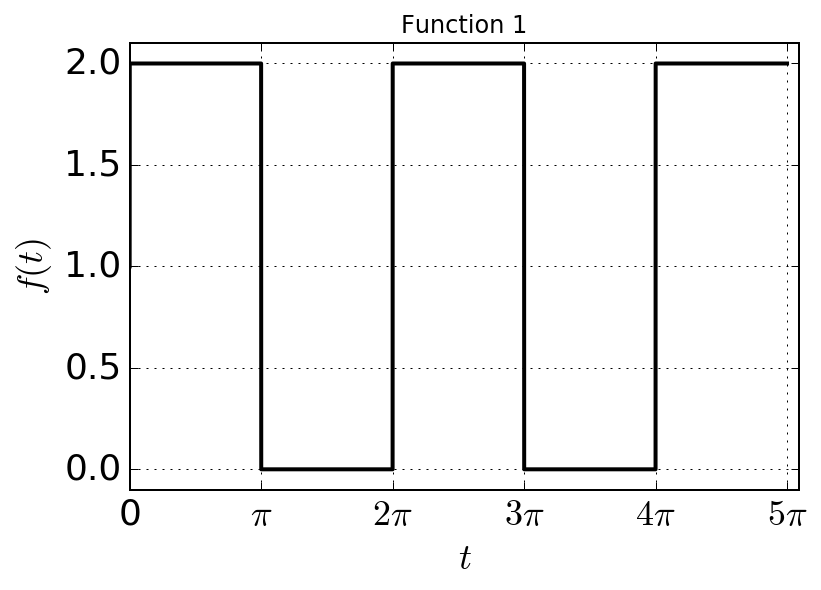

In [11]:
t= np.arange(0, 5*np.pi, 1/Fs)

fig, ax= plt.subplots()
ax.plot(t, func1(t), 'k', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.tick_params(which='major', labelsize=18)
plt.xlabel('$t$', size=18); plt.ylabel('$f(t)$', size=18); plt.grid(True); plt.ylim((-0.1, 2.1)); plt.title("Function 1");

In [12]:
def fourierSeries(period, N):
    """Calculate the Fourier series coefficients up to the Nth harmonic"""
    
    result= []
    T= len(period)
    t= np.arange(T)
    for n in range(N+1):
        an= 2/T* (period* np.cos(2* np.pi* n* t/ T)).sum()
        bn= 2/T* (period* np.sin(2* np.pi* n* t/ T)).sum()
        result.append((an, bn))
    return np.array(result)

In [14]:
def fourierSeries_cn(period, N):
    """Calculate the Fourier series coefficients an, bn up to the Nth harmonic"""
    
    result= []
    T= len(period)
    t= np.arange(T)
    for n in range(N+1):
        # sign convention used by phycists
        c_plusn= 1/T* (period* np.exp(2j* np.pi* n* t/ T)).sum()
        c_minusn= 1/T* (period* np.exp(-2j* np.pi* n* t/ T)).sum()
        result.append((c_plusn, c_minusn))
    return np.array(result)

In [16]:
t_period= np.arange(0, 2* np.pi, 1/1000)
T= len(t_period)
#max(t_period)
T

6284

### And use it to calculate the coefficients up to the 20th order for the first function:

In [23]:
#t_period= np.arange(0, 2*np.pi, 1/1000)
F= fourierSeries(func1(t_period), 20) #[an, bn]
cn= fourierSeries_cn(func1(t_period), 20)
#F[:, 0]
cn

array([[ 9.99840866e-01+0.00000000e+00j,  9.99840866e-01+0.00000000e+00j],
       [ 1.59134309e-04+6.36619719e-01j,  1.59134309e-04-6.36619719e-01j],
       [-1.59134309e-04+6.57643497e-18j, -1.59134309e-04-6.57643497e-18j],
       [ 1.59134309e-04+2.12206432e-01j,  1.59134309e-04-2.12206432e-01j],
       [-1.59134309e-04-1.75625569e-18j, -1.59134309e-04+1.75625569e-18j],
       [ 1.59134309e-04+1.27323689e-01j,  1.59134309e-04-1.27323689e-01j],
       [-1.59134309e-04-5.09794484e-17j, -1.59134309e-04+5.09794484e-17j],
       [ 1.59134309e-04+9.09453105e-02j,  1.59134309e-04-9.09453105e-02j],
       [-1.59134309e-04+5.83026095e-18j, -1.59134309e-04-5.83026095e-18j],
       [ 1.59134309e-04+7.07350529e-02j,  1.59134309e-04-7.07350529e-02j],
       [-1.59134309e-04+8.20211711e-18j, -1.59134309e-04-8.20211711e-18j],
       [ 1.59134309e-04+5.78739413e-02j,  1.59134309e-04-5.78739413e-02j],
       [-1.59134309e-04+1.09162803e-17j, -1.59134309e-04-1.09162803e-17j],
       [ 1.59134309e-04+4

In [30]:
import cmath, math
#math.atan2(cn[n, 1].imag, cn[n, 1].real):
phase= []
for n in range(len(cn)- 1):
    c= math.atan2(cn[n, 0].imag, cn[n, 0].real)
    phase.append(c)
#phaseD[phaseD < -3]= 0
phaseD= np.asarray(phase)
phaseD

array([ 0.        ,  1.57054636,  3.14159265,  1.57004642, -3.14159265,
        1.56954649, -3.14159265,  1.56904655,  3.14159265,  1.56854661,
        3.14159265,  1.56804666,  3.14159265,  1.56754671,  3.14159265,
        1.56704676, -3.14159265,  1.5665468 ,  3.14159265,  1.56604684])

In [31]:
phaseD[phaseD > 2.]= 0.0
phaseD[phaseD < -2.]= 0.0
phaseD

array([0.        , 1.57054636, 0.        , 1.57004642, 0.        ,
       1.56954649, 0.        , 1.56904655, 0.        , 1.56854661,
       0.        , 1.56804666, 0.        , 1.56754671, 0.        ,
       1.56704676, 0.        , 1.5665468 , 0.        , 1.56604684])

C:\Users\Omen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Omen\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\Users\Omen\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individua

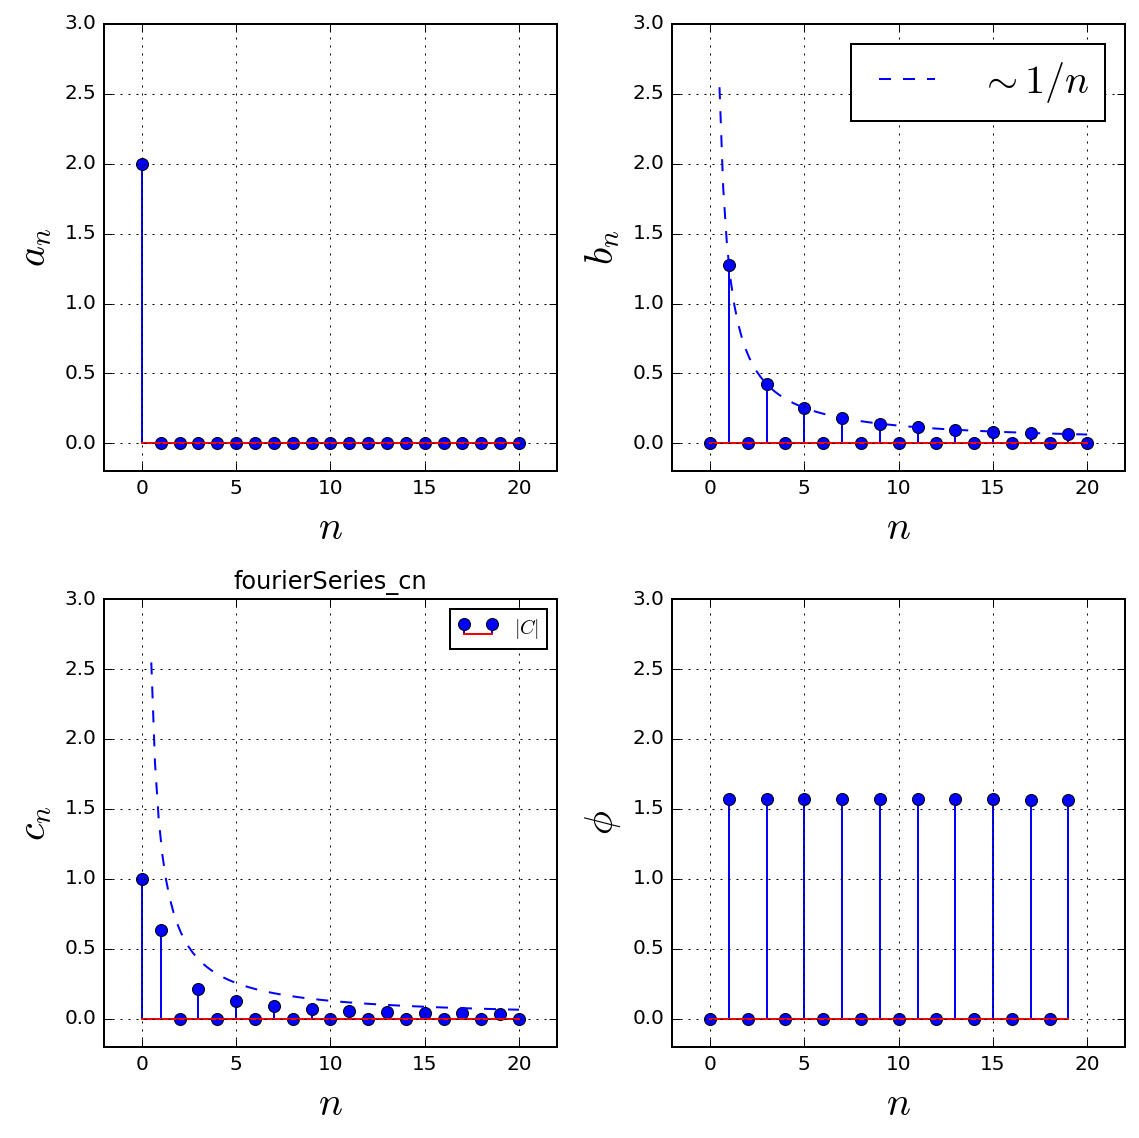

In [36]:
plt.figure(figsize=(8,8))

plt.subplot(221); plt.stem(F[:,0])
plt.grid(True); plt.xlabel('$n$',fontsize=20); 
plt.ylabel('$a_n$',fontsize=20); 
plt.ylim((-0.2,3)); plt.xlim((-2,22))

plt.subplot(222); plt.stem(F[:,1])
plt.grid(True); plt.xlabel('$n$',fontsize=20); 
plt.ylabel('$b_n$',fontsize=20); 
plt.ylim((-0.2,3)); plt.xlim((-2,22))
n = np.linspace(0.5,20,100);
plt.plot(n, 4/(np.pi*n),'--', label=r'$\sim 1/n$'); plt.legend(fontsize=20)
yl = plt.gca().get_ylim()

plt.subplot(223)
plt.stem(abs(cn[:,0]),label='$|C|$')
plt.ylim((-0.2,3)); plt.xlim((-2,22))
plt.grid(True); plt.xlabel('$n$',fontsize=20); plt.ylabel('$c_n$',fontsize=20); 
plt.title('fourierSeries_cn'); plt.legend(fontsize=10)
n = np.linspace(0.5,20,100);
plt.plot(n, 4/(np.pi*n),'--'); 
plt.subplot(224)
plt.stem(phaseD,label='$|phase|$')
plt.ylim((-0.2,3)); 
plt.xlim((-2,22))
plt.grid(True); plt.xlabel('$n$',fontsize=20); plt.ylabel('$\phi$',fontsize=20); 

plt.tight_layout()

## reconstruction of the signal by calculating s(𝑡) from its Fourier series coefficients up to a given order.

In [40]:
def reconstruct(P, anbn):
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a/2
        result = result + a*np.cos(2*np.pi*n*t/P) + b * np.sin(2*np.pi*n*t/P)
    return result


### the reconstructed signal for rectangular function up to the 20th harmonic:

In [41]:
F= fourierSeries(func1(t_period), 100)

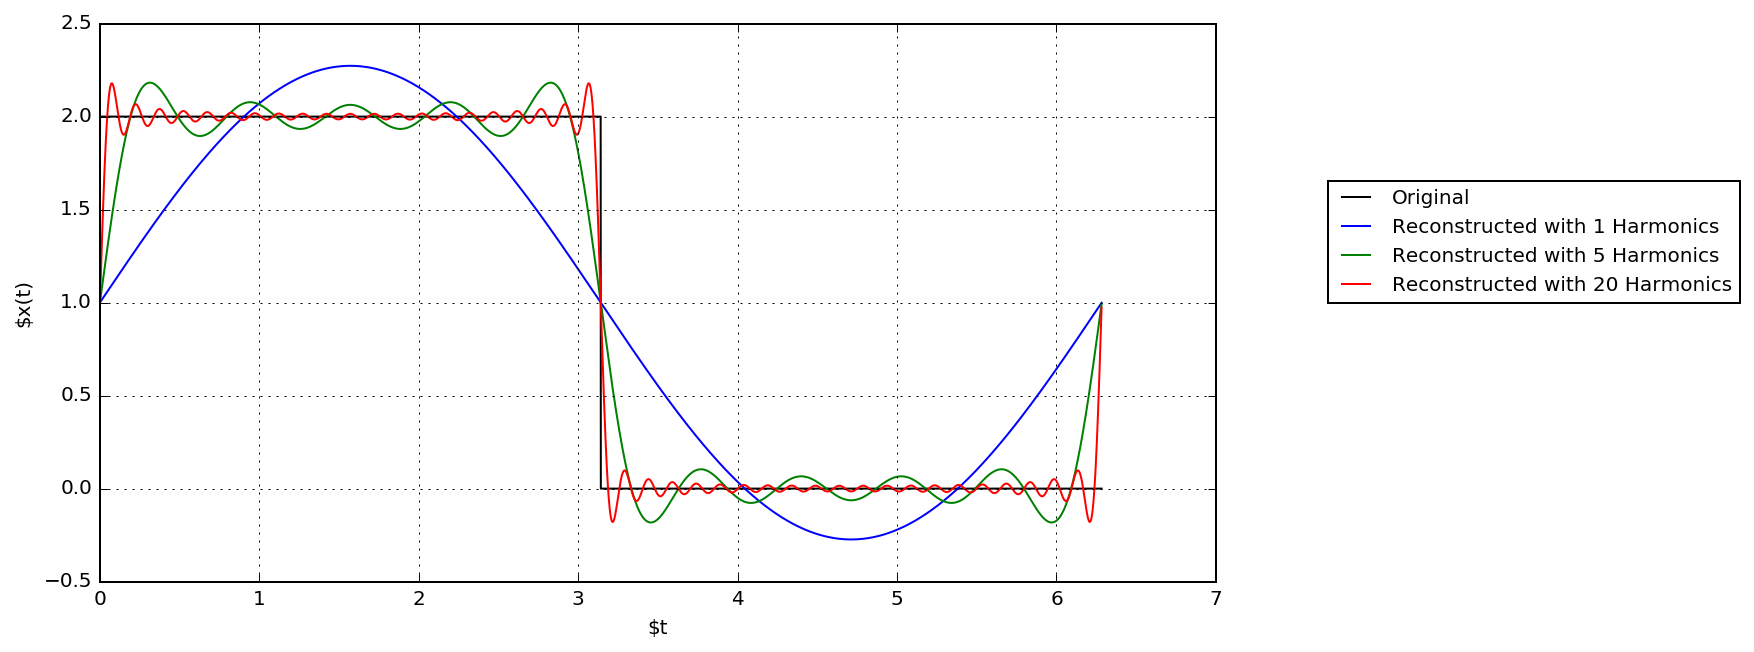

In [48]:
#an, bn come from F
plt.figure(figsize=(10, 5))
plt.plot(t_period, func1(t_period), 'k', label='Original', lw=1)
plt.plot(t_period, reconstruct(len(t_period), F[:2, :]), label= 'Reconstructed with 1 Harmonics');
plt.plot(t_period, reconstruct(len(t_period), F[:11, :]), label= 'Reconstructed with 5 Harmonics');
plt.plot(t_period, reconstruct(len(t_period), F[:42, :]), label= 'Reconstructed with 20 Harmonics');

#we got F value every 2 point so F[:2, :] = F[:3, :]

plt.grid(True); plt.ylabel('$x(t)'); plt.xlabel('$t');
plt.legend(loc= [1.1, .5], fontsize=10);

###### Let us now have a look at the Fourier Series of some functions, and how their approximation by the Fourier series appears for different number of Harmonics:

In [56]:
def showHarmonics(period, N):
    """Calculate the Fourier Series up to N harmonics, and show the reconstructed signal."""
    F = fourierSeries(period, N+1)
    plt.gcf().clear()
    plt.subplot(231); plt.stem(F[:,0])
    plt.xlim((0,20)); Vi = F.min(); Va = F.max(); plt.ylim((Vi,Va)); plt.ylabel('$a_n$')
    plt.subplot(234); plt.stem(F[:,1])
    plt.xlim((0,20)); plt.ylim((Vi,Va)); plt.xlabel('Harmonic'); plt.ylabel('$b_n$')
    plt.subplot(132)
    T = len(period)
    t = np.arange(T)/T
    result = 0
    for n, (an, bn) in enumerate(F):
        if n == 0:
            an = an/2
        cos_part = an*np.cos(2*np.pi*n*t)
        sin_part = bn*np.sin(2*np.pi*n*t)
        plt.plot(t, cos_part)
        plt.plot(t, sin_part)
        result = result + cos_part + sin_part
    plt.grid(True); plt.ylabel(r'$a_n \sin(2\pi n t), b_n\cos(2\pi nt)$'); plt.xlabel('$t$');
    plt.text(0.5, 0.8*abs(F[1:,:]).max(), 'N=%d' % N, bbox=dict(facecolor='white'))
    plt.subplot(133)
    t2 = np.arange(2*T)/T
    plt.plot(t2, np.tile(period, 2))
    plt.plot(t2, np.tile(result, 2))
    plt.grid(True); plt.ylabel(r'$x(t), r_N(t)$'); plt.xlabel('$t$');
    plt.ylim((period.min()-0.4, period.max()+0.4))
    plt.tight_layout()
    showInInteract()

In [61]:
period1 = func1(np.arange(0, 2*np.pi, 1/1000))
interact(lambda N: showHarmonics(period1, N), N=(1, 20));

interactive(children=(IntSlider(value=10, description='N', max=20, min=1), Output()), _dom_classes=('widget-in…

# Exercise

In [62]:
T1=2*np.pi  # T=2pi
functionEX1 = lambda t: (abs((t%T1)-T1*3/4) < T1/4).astype(float) - (abs((t%T1)-T1/4) < T1/4).astype(float)
functionEX2 = lambda t: (abs(t%T1))* (abs((t%T1)-T1/4)<T1/4)
functionEX3 = lambda t: (abs(t%T1))* (abs((t%T1)-T1/4)<T1/4)+(abs((t%T1)-T1*3/4)<T1/4).astype(float)*T1/2
functionEX4 = lambda t: t % T1/2
functionEX6 = lambda t: t % T1/2-T1/2

In [67]:
Fs=1000
t = np.arange(-3*np.pi, 3*np.pi, 1/Fs)
#y=functionEX1(t)
#y=functionEX2(t)
#y=functionEX3(t)
y=functionEX4(t)
#y=functionEX6(t)

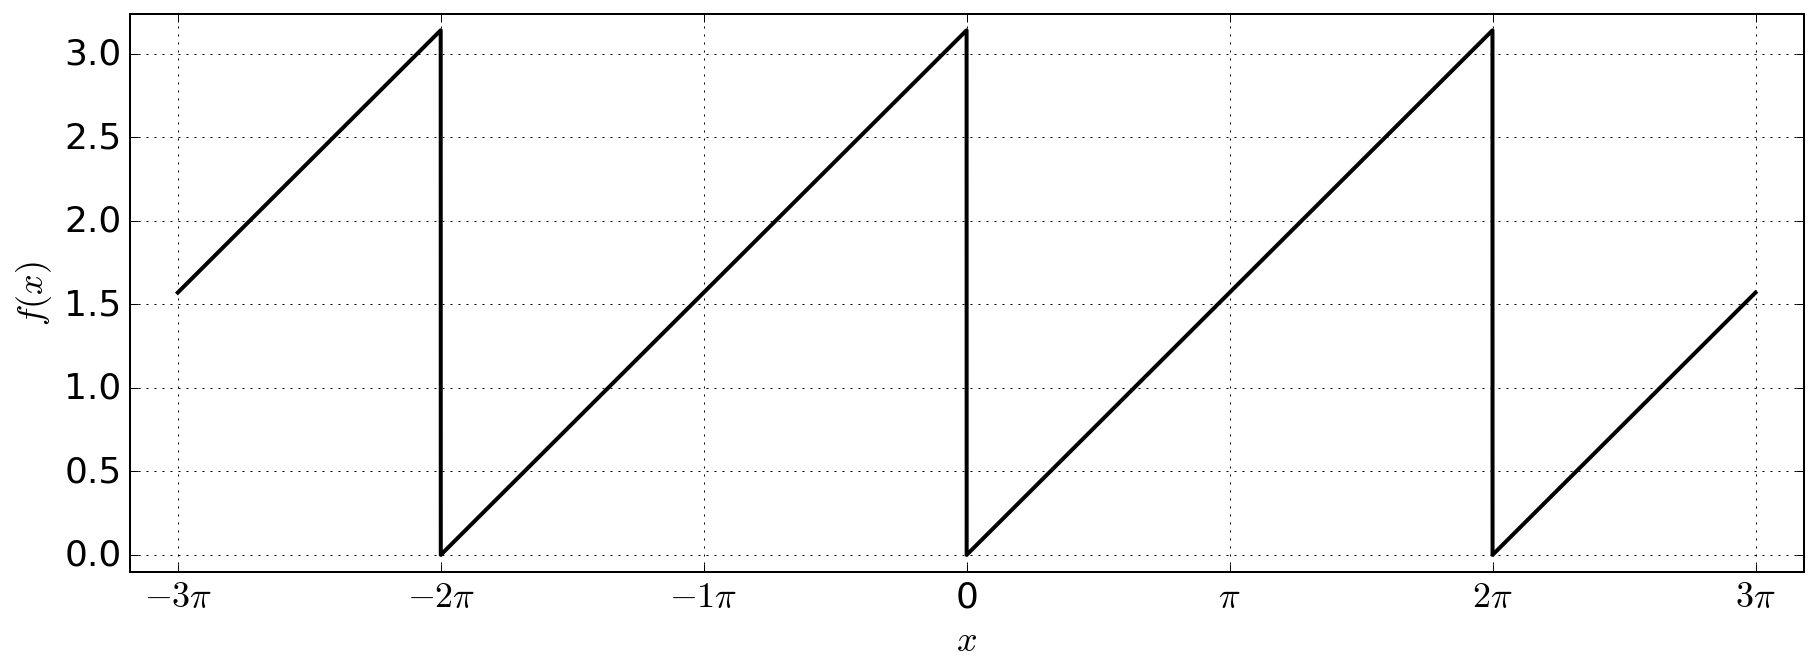

In [68]:
fig, ax = plt.subplots()
ax.plot(t, y,'k',lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.tick_params(which='major', labelsize=18)
plt.xlabel('$x$',size=18); plt.ylabel('$f(x)$',size=18); plt.grid(True); plt.ylim((min(y)-0.1, max(y)+0.1));

In [69]:
# same periodic function
T=1
t = np.arange(-30, 30, 1/500)
#test1=lambda t: (t>0)*(t<40)*(-0.0000156*(t-20)**4+2.5)
#test1 = lambda t: (abs((t%T)-T*3/4) < T/4)*(-0.0000156*(t-20)**4+2.5) - (abs((t%T)-T/4) < T/4).astype(float)
test1 = lambda t: np.cos((t % T1/2-T1/2))

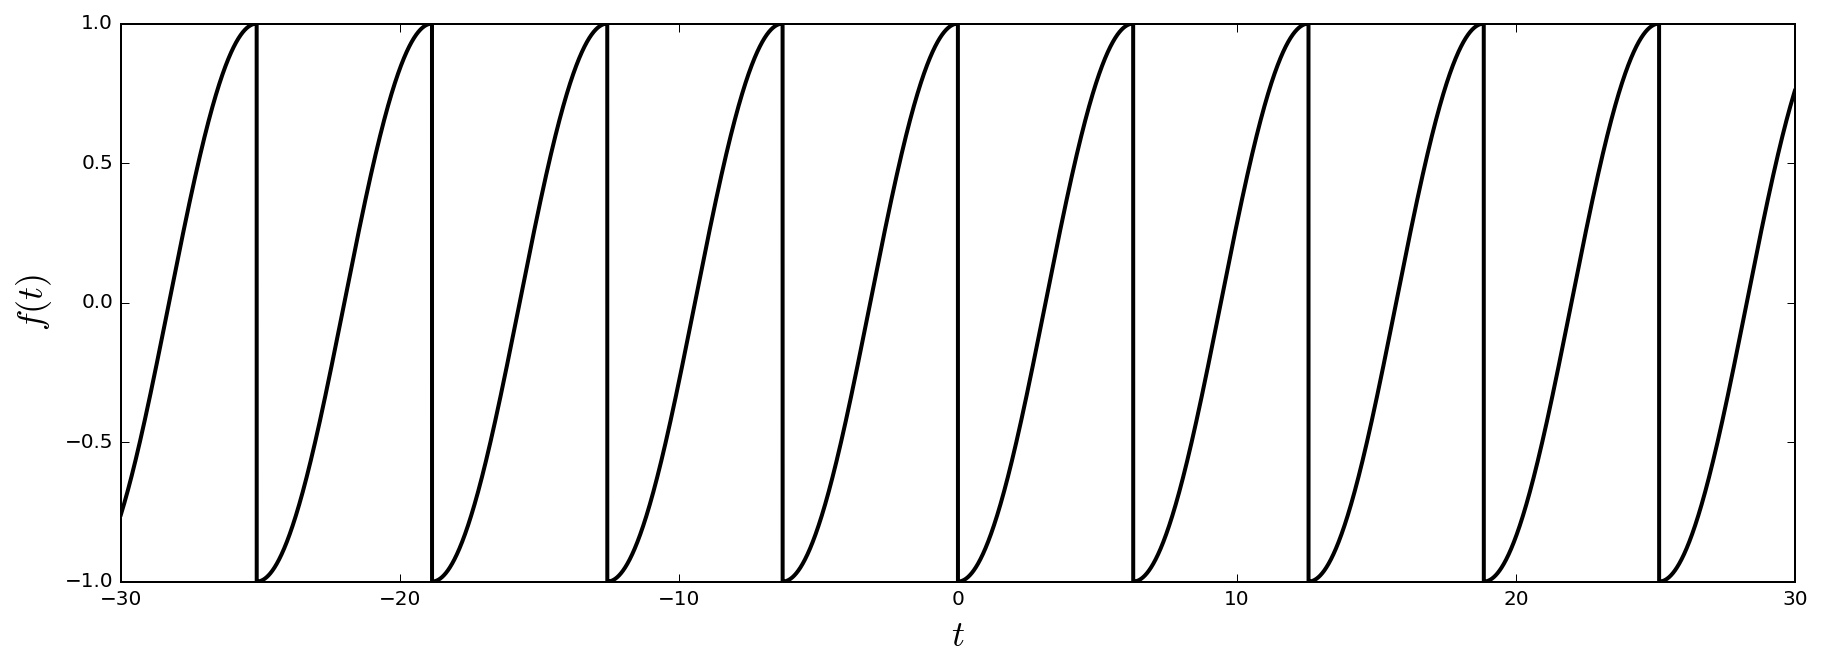

In [70]:
fig, ax = plt.subplots()
y=test1(t)
plt.plot(t, y,'k',lw=2)
plt.xlabel('$t$',size=18); plt.ylabel('$f(t)$',size=18);